## Project 10; Chapter 8: Advanced Data Analytics
Drew Sandberg | ECON 611


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import random

# "Madison" dataset looks like this...
#   countrycode      country  year  cgdppc  rgdpnapc     pop         i_cig i_bm
# 0         AFG  Afghanistan  1820     NaN       NaN  3280.0           NaN  NaN

# To set index_col, you'll need to use the integers as you can't use string values to 
# identify columns for use as indexes.
df = pd.read_excel("mpd2018.xlsx", sheet_name = "Full data", index_col =[0,2])
df

country  cgdppc  rgdpnapc      pop         i_cig i_bm
countrycode year                                                           
AFG         1820  Afghanistan     NaN       NaN   3280.0           NaN  NaN
            1870  Afghanistan     NaN       NaN   4207.0           NaN  NaN
            1913  Afghanistan     NaN       NaN   5730.0           NaN  NaN
            1950  Afghanistan  2392.0    2392.0   8150.0  Extrapolated  NaN
            1951  Afghanistan  2422.0    2422.0   8284.0  Extrapolated  NaN
...                       ...     ...       ...      ...           ...  ...
ZWE         2012     Zimbabwe  1623.0    1604.0  12620.0  Extrapolated  NaN
            2013     Zimbabwe  1801.0    1604.0  13183.0  Extrapolated  NaN
            2014     Zimbabwe  1797.0    1594.0  13772.0  Extrapolated  NaN
            2015     Zimbabwe  1759.0    1560.0  14230.0  Extrapolated  NaN
            2016     Zimbabwe  1729.0    1534.0  14547.0  Extrapolated  NaN

[19873 rows x 6 columns]

## Notes for Drew:
Before you starting thinking all of this applies to ANY pandas column (and it can, I guess), but recall that we've set up the "Madison" dataset as df and on importing, we indexed the dataframe with columns 0 and 2; year and country ISO Code...

You'll want to review this someday when you feel you need a refresher on working with indexes in pandas dataframes.

#### Trick 1: Group into a new dataframe...
- years = df.groupby('year')

#### Trick 2: Aggregate values for each key by the grouped column.
- years = df.groupby('year').mean()

#### Trick 3: Get unique values of an index from get_level_values, which is like Factor levels in R
- Adding set returns the unqiue levels from get_level_values
- Addling list will make it an list, rather than a series
years = list(set(df.index.get_level_values('year')))

#### Trick 4: STill not sure I know what .index really does
- years = list(df.groupby('year').mean().index)

#### Not a Trick 5:
- df['year'].unique()) --this doesn't work, because the *column name* is an INDEX! and not a KEY

In [2]:
### Now... let's set up lists containing a subset of distinct values for 'year' and 'country' columns (indexes)
years = list(df.groupby('year').mean().index)
countries = list(df.groupby('countrycode').mean().index)

### use the logy function i!

what are we doing here?  working with panel data uisng a single index.

In [3]:
## What are my country code options?
print(sorted(countries))

['AFG', 'AGO', 'ALB', 'ARE', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHR', 'BIH', 'BLR', 'BOL', 'BRA', 'BRB', 'BWA', 'CAF', 'CAN', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COL', 'COM', 'CPV', 'CRI', 'CSK', 'CUB', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ESP', 'EST', 'ETH', 'FIN', 'FRA', 'GAB', 'GBR', 'GEO', 'GHA', 'GIN', 'GMB', 'GNB', 'GNQ', 'GRC', 'GTM', 'HKG', 'HND', 'HRV', 'HTI', 'HUN', 'IDN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KOR', 'KWT', 'LAO', 'LBN', 'LBR', 'LBY', 'LCA', 'LKA', 'LSO', 'LTU', 'LUX', 'LVA', 'MAR', 'MDA', 'MDG', 'MEX', 'MKD', 'MLI', 'MLT', 'MMR', 'MNE', 'MNG', 'MOZ', 'MRT', 'MUS', 'MWI', 'MYS', 'NAM', 'NER', 'NGA', 'NIC', 'NLD', 'NOR', 'NPL', 'NZL', 'OMN', 'PAK', 'PAN', 'PER', 'PHL', 'POL', 'PRI', 'PRK', 'PRT', 'PRY', 'PSE', 'QAT', 'ROU', 'RUS', 'RWA', 'SAU', 'SDN', 'SEN', 'SGP', 'SLE', 'SLV', 'SRB', 'STP', 'SUN', 'SVK', 'SVN'

### Showboatin' alert...

In [4]:
## Lets' get crafty by randomly selecting 2,, 3, and 4 country groupings from the list... and do it in a generator function
def random_country_tuple(n):
    items = random.sample(range(len(countries)), n)
    return tuple(sorted([countries[i] for i in items]))

def random_country_list(n):
    items = random.sample(range(len(countries)), n)
    return list(sorted([countries[i] for i in items]))

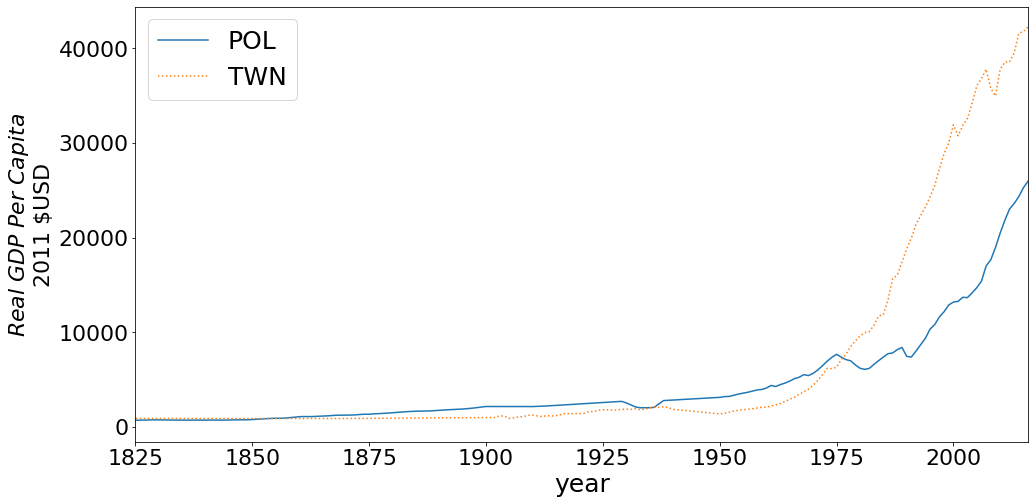

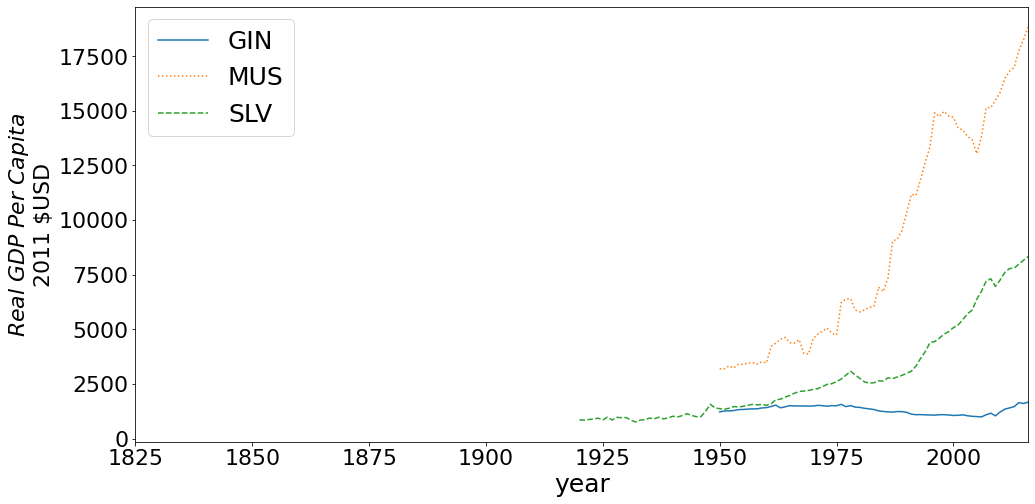

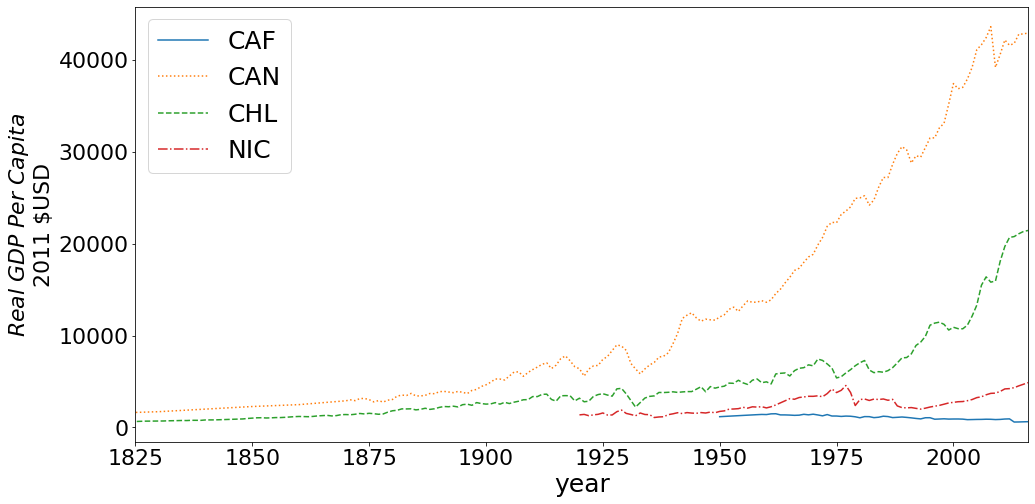

In [5]:
c2 = random_country_tuple(2)
c3 = random_country_tuple(3)
c4 = random_country_tuple(4)

country_sets = [c2, c3, c4]
linestyles = ["-", ":","--","-."]

# set graph global parameters
plt.rcParams.update({"legend.fontsize": 25, "legend.handlelength": 2})  
plt.rcParams.update({"font.size": 25})  

for item in country_sets:
    fig, ax = plt.subplots(figsize = (16,8))
    for i in range(len(item)):   # how many countries are in your item grouping?
        country = item[i]
        linestyle = linestyles[i] # match linestyle to it's position within the group of countries.
        df.loc[country, :]   # this is clever... is 
        
        # the following line = log_y() ;)
        #data.loc[country,:]["cgdppc"].dropna().plot.line(ax = ax,  label = country, linestyle = linestyle, logy=True) 
        
        # the following line includes changing the font size... use this as needed.
        df.loc[country,:]["cgdppc"].dropna().plot.line(ax = ax,  label = country, linestyle = linestyle, fontsize = 22) 
        plt.xlim([1825, max(years)])
        plt.ylabel("$Real$ $GDP$ $Per$ $Capita$\n2011 \$USD",fontsize=22)  
    plt.legend()  
    plt.show()  
    plt.close()  

## Now... Merging Data with a Double Index

In [6]:
# read in another dataset...
fraser = pd.read_csv("cleanedEconFreedomData.csv",index_col = [0,1],parse_dates = False)

# Yeah, we're gonna drop nulls/nan now...
fraser.dropna(axis=0, how="all", inplace=True)

In [7]:
# See that the fraser dataset and the existing df have the same primary key structures (indexes)
print('First index of Fraser dataset looks like:', fraser.index[0], 'and first index of df looks like:',df.index[0])

First index of Fraser dataset looks like: ('ALB', 2017) and first index of df looks like: ('AFG', 1820)


#### Gotta Remember Later...
That if you're dealing with multiple dataframes with same indexes, you certainly can "copy" a column from one to another and that looks like the code below:

In [8]:
fraser['RGDP per Capita'] = df['rgdpnapc']
fraser

EFW  Size of Government  Legal System & Property Rights  \
ISO_Code Year                                                                 
ALB      2017  7.673511            7.528167                        5.064907   
         2016  7.637742            7.875862                        5.071814   
         2015  7.639666            7.904257                        5.003489   
         2014  7.586769            7.882037                        4.666740   
         2013  7.389525            7.807904                        4.543782   
...                 ...                 ...                             ...   
ZWE      2000  4.299839            5.365058                        4.662445   
         1995  5.518614            6.418859                        5.138131   
         1990  4.516140            5.108843                        3.439437   
         1985  4.226841            5.026250                        2.633492   
         1980  4.054740            6.322625                        1.379602   

               Sound Money  Freedom to trade internationally  Regulation  \
ISO_Code Year                                                              
ALB      2017     9.648271                          8.343863    7.782349   
         2016     9.553657                          8.214900    7.472476   
         2015     9.585625                          8.109118    7.595838   
         2014     9.629320                          8.208630    7.547119   
         2013     9.690942                          7.705771    7.199224   
...                    ...                               ...         ...   
ZWE      2000     2.891166                          3.224735    5.355792   
         1995     4.915293                          5.839664    5.423290   
         1990     5.664840                          4.689623    3.953668   
         1985     6.305850                          3.161743    4.207229   
         1980     6.343342                          3.277015    3.280637   

               RGDP per Capita  
ISO_Code Year                   
ALB      2017              NaN  
         2016          10342.0  
         2015          10032.0  
         2014           9808.0  
         2013           9660.0  
...                        ...  
ZWE      2000           2249.0  
         1995           2156.0  
         1990           2232.0  
         1985           2198.0  
         1980           2133.0  

[3030 rows x 7 columns]

In [9]:
# write the merged Fraser and Maddison (df) datasets to file...
fraser.to_csv("fraserDataWithRGDPC.csv")

In [10]:
# copy fraser df to a new df
data = fraser

### Authoring Function to Create "Indicator" Variables

Prof. Caton refers to indicator variables... 

To me... "indicator" is simply setting a new column as a bit/binary, then applying to rule to another set oc daeta to determine if the value in that row/column **IS** OR **IS NOT** meeting the rule.  So, Is this crop a Burbank variety crop or not.. then add a new column called IsBurbank, as set the values as 0 / 1.

In [11]:
def create_feature_variable(data, feature_name, index_name, target_index_list):  
    #set default value to 0; in other cases you might chose True/1... depending on what you're doing
    data[feature_name] = 0  
    # set the desired items to 1/True!
    data.loc[target_index_list, [feature_name]] = int(1)

In [12]:
data.index

MultiIndex([('ALB', 2017),
            ('ALB', 2016),
            ('ALB', 2015),
            ('ALB', 2014),
            ('ALB', 2013),
            ('ALB', 2012),
            ('ALB', 2011),
            ('ALB', 2010),
            ('ALB', 2009),
            ('ALB', 2008),
            ...
            ('ZWE', 2005),
            ('ZWE', 2004),
            ('ZWE', 2003),
            ('ZWE', 2002),
            ('ZWE', 2001),
            ('ZWE', 2000),
            ('ZWE', 1995),
            ('ZWE', 1990),
            ('ZWE', 1985),
            ('ZWE', 1980)],
           names=['ISO_Code', 'Year'], length=3030)

In [13]:
index_name = data.index.names[0]
feature_column_name = 'isRandomlySelected'
randomly_selected_countries = random_country_list(6)
print(randomly_selected_countries)


create_feature_variable(
    data = data,
    feature_name = feature_column_name,
    index_name = index_name,
    target_index_list = randomly_selected_countries
)
data


['GHA', 'IRQ', 'ISL', 'NLD', 'PER', 'SWE']


EFW  Size of Government  Legal System & Property Rights  \
ISO_Code Year                                                                 
ALB      2017  7.673511            7.528167                        5.064907   
         2016  7.637742            7.875862                        5.071814   
         2015  7.639666            7.904257                        5.003489   
         2014  7.586769            7.882037                        4.666740   
         2013  7.389525            7.807904                        4.543782   
...                 ...                 ...                             ...   
ZWE      2000  4.299839            5.365058                        4.662445   
         1995  5.518614            6.418859                        5.138131   
         1990  4.516140            5.108843                        3.439437   
         1985  4.226841            5.026250                        2.633492   
         1980  4.054740            6.322625                        1.379602   

               Sound Money  Freedom to trade internationally  Regulation  \
ISO_Code Year                                                              
ALB      2017     9.648271                          8.343863    7.782349   
         2016     9.553657                          8.214900    7.472476   
         2015     9.585625                          8.109118    7.595838   
         2014     9.629320                          8.208630    7.547119   
         2013     9.690942                          7.705771    7.199224   
...                    ...                               ...         ...   
ZWE      2000     2.891166                          3.224735    5.355792   
         1995     4.915293                          5.839664    5.423290   
         1990     5.664840                          4.689623    3.953668   
         1985     6.305850                          3.161743    4.207229   
         1980     6.343342                          3.277015    3.280637   

               RGDP per Capita  isRandomlySelected  
ISO_Code Year                                       
ALB      2017              NaN                   0  
         2016          10342.0                   0  
         2015          10032.0                   0  
         2014           9808.0                   0  
         2013           9660.0                   0  
...                        ...                 ...  
ZWE      2000           2249.0                   0  
         1995           2156.0                   0  
         1990           2232.0                   0  
         1985           2198.0                   0  
         1980           2133.0                   0  

[3030 rows x 8 columns]

In [14]:
# See the format here: df.loc[index, [key1...]]
data.loc['USA', ['isRandomlySelected']]

,isRandomlySelected
Year,
2017,0
2016,0
2015,0
2014,0
2013,0
2012,0
2011,0
2010,0
2009,0


### Let's plot... 

In [15]:
import datetime
calendarYear = 2000

plot_data = data[
    data.index.get_level_values("Year") == calendarYear
]

plot_data


,,EFW,Size of Government,Legal System & Property Rights,Sound Money,Freedom to trade internationally,Regulation,RGDP per Capita,isRandomlySelected
ISO_Code,Year,,,,,,,,
ALB,2000,6.296170,7.260723,4.585351,7.396284,5.948380,6.290114,5097.0,0
DZA,2000,4.796785,4.236876,3.295760,7.003710,5.263068,4.184510,10528.0,0
ARG,2000,7.218572,8.001421,4.757417,9.709159,7.451847,6.173016,15119.0,0
AUS,2000,8.105358,6.815197,8.530602,9.402096,7.811404,7.967489,39200.0,0
AUT,2000,8.002885,5.464242,8.613877,9.627837,8.966296,7.342173,36363.0,0
...,...,...,...,...,...,...,...,...,...
USA,2000,8.518073,7.376862,8.472453,9.777079,8.399517,8.564456,45887.0,0
URY,2000,6.993437,6.371031,5.758478,8.393894,8.166681,6.277104,12932.0,0
VEN,2000,5.683733,5.715487,3.916083,5.559516,7.741570,5.486009,14904.0,0


Text(0.5, 1.0, '2000')

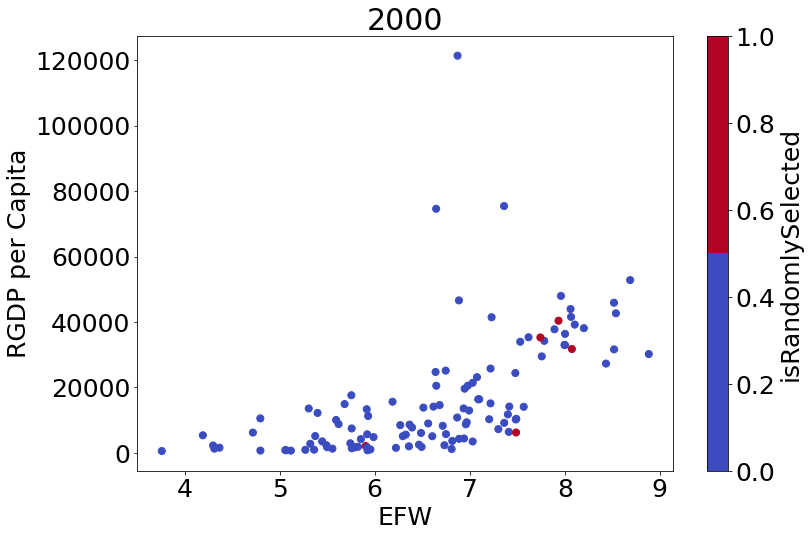

In [16]:
from matplotlib import cm
norm = cm.colors.Normalize()
cmap = cm.get_cmap('coolwarm', 2)


fig, ax = plt.subplots(figsize = (12,8))
plot_data.plot.scatter(
    x = "EFW",
    y = "RGDP per Capita",
    c = 'isRandomlySelected',
    #cmap = "coolwarm",
    cmap = cmap, 
#     norm = norm,
    ax=ax,
    s=50
)

ax.set_title(str(calendarYear), fontsize = 30)

### Group by Quantile

In [17]:
# choose numbers of divisions  
n = 5  

#create column identifying n-tile rank  
quantile_var = "RGDP per Capita"  
quantile_name = quantile_var + " " + str(n) + "-tile"  
data[quantile_name] = np.nan

In [18]:
def create_quantile(n, data, year, quantile_var, quantile_name):      
    # index that indentifies countries for a given year  
    year_index = data.index.get_level_values("Year") == year  
    year_data = data[year_index][quantile_var]
    quantile_values_dict = {i:year_data.quantile(i/n) for i in range(1, n + 1)}  
    # cycle through each country for a given year  
    for index in data[year_index].index:  
        # identtify value of the variable of interest  
        val = data.loc[index][quantile_var]  
        # compare that value to the values that divide each quantile  
        for i in range(1, n + 1):  
            # if the value is less than the highest in the quantile identified,  
            # save quantile as i  
            if val <= quantile_values_dict[i]:  
                data.loc[index,[quantile_name]]=int((n + 1) - i)  
                #exit loop  
                break  
            # otherwise check the higest value of the next quantile  
            else:  
                 continue  

In [19]:
years = data.groupby("Year").mean().index
for year in years:
    create_quantile(n, data, year, quantile_var, quantile_name)

In [20]:
data[["RGDP per Capita", "RGDP per Capita 5-tile"]]

RGDP per Capita  RGDP per Capita 5-tile
ISO_Code Year                                         
ALB      2017              NaN                     NaN
         2016          10342.0                     3.0
         2015          10032.0                     3.0
         2014           9808.0                     3.0
         2013           9660.0                     3.0
...                        ...                     ...
ZWE      2000           2249.0                     5.0
         1995           2156.0                     5.0
         1990           2232.0                     5.0
         1985           2198.0                     5.0
         1980           2133.0                     5.0

[3030 rows x 2 columns]

In [21]:
data.columns

Index(['EFW', 'Size of Government', 'Legal System & Property Rights',
       'Sound Money', 'Freedom to trade internationally', 'Regulation',
       'RGDP per Capita', 'isRandomlySelected', 'RGDP per Capita 5-tile'],
      dtype='object')

In [22]:
data

EFW  Size of Government  Legal System & Property Rights  \
ISO_Code Year                                                                 
ALB      2017  7.673511            7.528167                        5.064907   
         2016  7.637742            7.875862                        5.071814   
         2015  7.639666            7.904257                        5.003489   
         2014  7.586769            7.882037                        4.666740   
         2013  7.389525            7.807904                        4.543782   
...                 ...                 ...                             ...   
ZWE      2000  4.299839            5.365058                        4.662445   
         1995  5.518614            6.418859                        5.138131   
         1990  4.516140            5.108843                        3.439437   
         1985  4.226841            5.026250                        2.633492   
         1980  4.054740            6.322625                        1.379602   

               Sound Money  Freedom to trade internationally  Regulation  \
ISO_Code Year                                                              
ALB      2017     9.648271                          8.343863    7.782349   
         2016     9.553657                          8.214900    7.472476   
         2015     9.585625                          8.109118    7.595838   
         2014     9.629320                          8.208630    7.547119   
         2013     9.690942                          7.705771    7.199224   
...                    ...                               ...         ...   
ZWE      2000     2.891166                          3.224735    5.355792   
         1995     4.915293                          5.839664    5.423290   
         1990     5.664840                          4.689623    3.953668   
         1985     6.305850                          3.161743    4.207229   
         1980     6.343342                          3.277015    3.280637   

               RGDP per Capita  isRandomlySelected  RGDP per Capita 5-tile  
ISO_Code Year                                                               
ALB      2017              NaN                   0                     NaN  
         2016          10342.0                   0                     3.0  
         2015          10032.0                   0                     3.0  
         2014           9808.0                   0                     3.0  
         2013           9660.0                   0                     3.0  
...                        ...                 ...                     ...  
ZWE      2000           2249.0                   0                     5.0  
         1995           2156.0                   0                     5.0  
         1990           2232.0                   0                     5.0  
         1985           2198.0                   0                     5.0  
         1980           2133.0                   0                     5.0  

[3030 rows x 9 columns]

Text(0.5, 1.0, 'Year: 2016')

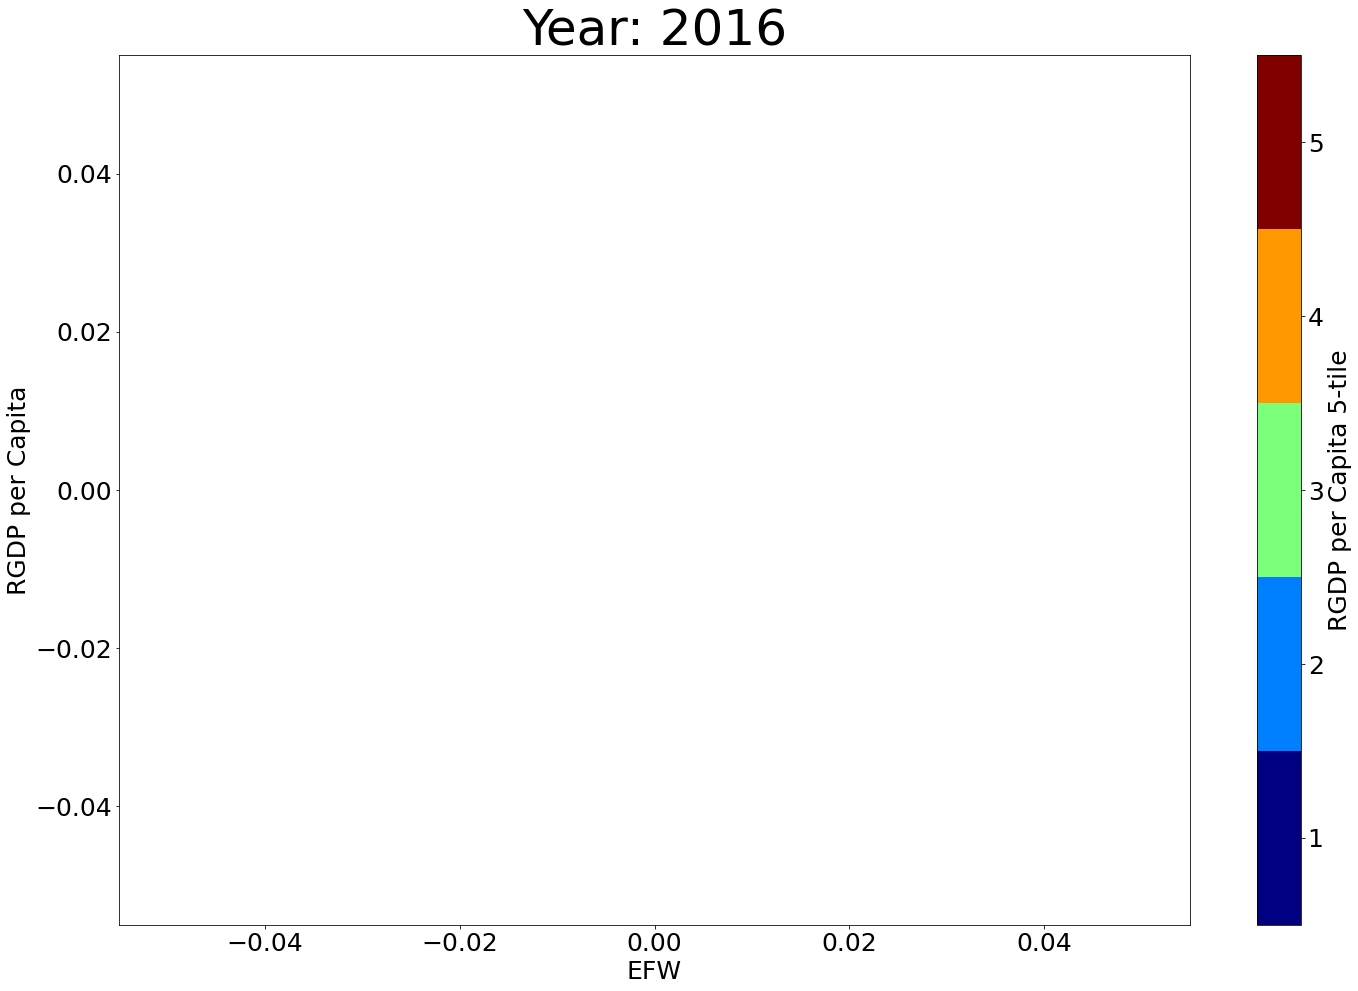

In [26]:
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

year = 2016
plot_data = data[data.index.get_level_values("Year")== datetime.datetime(year,1,1)]
fig, ax = plt.subplots(figsize = (24, 16))

# change colors, divide into 4 distinct colors
norm = cm.colors.Normalize()
cmap = cm.get_cmap('jet', n)
plt.cm.ScalarMappable(cmap=cmap, norm = norm)  #, norm=norm)

# set vmin to 0.5 to slight shift scale, otherwise quintile 
# measures will be on border between colors and 1 and 2 will be 
# indicated in lightblue
plot_data.plot.scatter(x = "EFW", y = "RGDP per Capita", 
                       c = "RGDP per Capita " + str(n) + "-tile",
                       cmap = cmap, 
#                        norm = norm,
                       ax = ax, 
                       s = 50,
                       legend = False, 
                       vmin = 0.5, 
                       vmax = 5.5)
ax.set_title("Year: " + str(year), fontsize = 50)

### Lag Variables and Differenced Log Values

With time series data, it is often useful to control for trends when data is autocorrelated. Consider, for example, that real GDP data is often highly correlated with values from the previous period. We might detect a false causal relationship between two variables that are actually unrelated but follow a similar trend. For example, we might regress your age against real GDP and find that there is a strong correlation between the two. To avaoid false positives like this, it is useful to account for the influence of lagged values and/or to detrend the data all together by using differenced logs.

Creating lag variables is quite simple if the index is already recognized as containing dates and times. The method, *df.shift(n)* accomplishes this. Pass a negative value to create a lagged variable from n periods previous and a positive value to create a variable that refers to data n periods in the future.

Because we are using a double index, we must specify to which index we must instruct Pandas as to which index the shift refers. We accomplish this by using *.groupby(level)* to target the index column that does not refer to a datetime data. This will group the data by entity, thus leaving only the date column to be referenced by *.shift(n)*. Since we only want a lag value from the period that immediately preceded the observation, *n=-1*.

In [29]:
sorted(data['Size of Government'].unique())

[1.5731284435010884,
 1.9775458579329477,
 2.036970976240256,
 2.321826496088195,
 2.3456072409644677,
 2.358114823622286,
 2.3683044925853656,
 2.3977324390835757,
 2.4015489307663844,
 2.442023755097686,
 2.679586067744545,
 2.7284459272714296,
 2.757057942116555,
 2.785631508207557,
 2.7975687553310955,
 2.833581466597251,
 2.8851889784972373,
 2.9514511016498064,
 2.981282386284207,
 3.0028063433379244,
 3.0101423563743697,
 3.025033390768136,
 3.097854942024435,
 3.151881775393382,
 3.156944563049384,
 3.1654928290558013,
 3.2001572312812008,
 3.227070502342304,
 3.258535248437404,
 3.2699480627349264,
 3.2812560549309087,
 3.310702064444777,
 3.333333333333333,
 3.361187194659578,
 3.3691789790591677,
 3.383406392527126,
 3.384824959223998,
 3.385275070074465,
 3.4197854595081534,
 3.420312153957753,
 3.42207977395387,
 3.441766594230004,
 3.453623305368582,
 3.491659267314863,
 3.5032057106577663,
 3.5184462849767724,
 3.5209702774230403,
 3.525686778478764,
 3.538889252609797,


### World Health Organization Adult Mortality Rate
[World Health Organization Adult Mortality Rates (15 - to 60)](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/adult-mortality-rate-(probability-of-dying-between-15-and-60-years-per-1000-population))